# **SVM & KNN**

**1. Giriş**

<div>

<img src="https://i1.wp.com/www.jacobsoft.com.mx/wp-content/uploads/2018/11/knn.png?fit=546%2C300&ssl=1" width="400"/>

<img src="https://community.alteryx.com/t5/image/serverpage/image-id/60277iC217F66E2AC54722/image-size/large?v=v2&px=999" width="500"/>

</div>

Bu uygulamada Sklearn kütüphanesi kullanılarak iki boyutlu iki farklı Gaussian veri üretilmiştir. Üretilen bu yapay veri seti ile Destek Vektör Makinaları ve K-En Yakın Komşu sınıflandırıcıları kullanılarak bir sınıflandırma çözümü hazırlanmıştır. Bu notebook içeriğinde bir SVM ve KNN sınıflandırıcıların nasıl çalıştığını ve iyi bir model hazırlanması için yapılabilecek çalışmaları içerir.

**İçindekiler**


**2.**   [Örnek Veri Oluşturulması](#cell-id1)

**3.** [Destek Vektör Makinaları](#cell-id2)

**4.** [K- en yakın komşu sınıflandırıcısı](#cell-id3)  



<a name="cell-id1"></a>
## **2.** Örnek Veri Oluşturulması

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import plotly.graph_objects as go
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
X, y = make_blobs(n_samples=100, 
                  n_features=2, 
                  centers=2, 
                  cluster_std=0.6, 
                  center_box=(-10.0, 10.0), 
                  shuffle=True, 
                  random_state=0)

In [3]:
X.shape

(100, 2)

In [4]:
y.shape

(100,)

In [ ]:
fig = go.Figure(data=go.Scatter(
    x = X[:, 0], 
    y = X[:, 1],
    mode='markers',
    marker=dict(
        size=12,
        color=y, 
        colorscale='Inferno'
    )
))

fig.update_layout(
    title="Two informative features, one cluster per class",
    xaxis_title="X1",
    yaxis_title="X2",
    template='ggplot2',
    width=600,
    font=dict(
        size=10,
        color="Black"
    ))

fig.show()

Verinin %80'i modeli eğitmek için kullanılırken, %20'si ondan oluşturulan modeli test etmek için kullanılacak şekilde bölünür.

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

<a name="cell-id2"></a>
## **3.** SVM (Destek Vektör Makinaları)

<div>
<img src="https://miro.medium.com/max/698/0*k-_v-Jc6vpkzOcUn.jpg
" width="300"/>
</div>

**Nasıl çalışırlar?**

Bir örnek alalım. İki tür veriniz olduğunu varsayalım. Bu verileri iki sınıfa ayırmak için bir dizi farklı hiper düzlem kullanılabilir (Şekil-3.1). Bir SVM'nin görevi, veri kümesini en iyi iki sınıfa ayıran en uygun düzlemi, yani marjın maksimum olduğu hiper düzlemi bulmaktır.
<div>
<center>
<img src="https://miro.medium.com/max/394/1*RUY56i6m3tUN52i90Z82qA.png" width="200"/>
<div>Şekil-3.1</div>
</center>
</div>
Bir SVM'nin optimal hiper düzlemi tanıma şekli aşağıdaki gibidir:

Düzlem ve destek vektörleri (kenar boşluğu) arasındaki mesafe hesaplanır.
Optimal hiper düzlem, her iki taraftaki en yakın veri noktalarından maksimum mesafeye sahip olan düzlemdir.

Lojistik regresyon için model aşağıdaki denklemle tanımlanabilir:
$P(y=1|x)=11+exp−wTx−b=σ(wTx+b)$
 
Model parametreleri (w, b), aşağıdaki düzenlenmiş negatif log-likelihood fonksiyonu optimize edilerek tahmin edilir:
$(w∗,b∗)=argminw,b−∑i=1Nyilog[σ(wTxi+b)]+(1−yi)log[σ(−wTxi−b)]+1CΩ([w,b])$

burada C, model karmaşıklığının tersini kontrol eden bir hiperparametredir (daha küçük değerler daha güçlü düzenlileştirmeyi ifade eder), Ω (⋅) ise, varsayılan olarak sklearn'de bir l2 -norm olarak kabul edilen düzenlileştirme terimidir.

Destek vektör makinesi için, model parametreleri (w∗,b∗) aşağıdaki kısıtlı optimizasyon problemi çözülerek tahmin edilir:
$s.t.minw∗,b∗,{ξi}∥w∥22+1C∑iξi∀i:yi[wTϕ(xi)+b]≥1−ξi,  ξi≥0$

In [ ]:
parameters = {'C':[0.1,1,10,100,1000],
              'kernel':['rbf','poly','sigmoid','linear'],
              'degree':[1,2,3,4,5,6],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

svc = SVC()
gs = GridSearchCV(svc, parameters, cv=5)
gs_results = gs.fit(x_train, y_train)

sorted(gs_results.cv_results_.keys())

SVM'ler tarafından kullanılan 3 ana çekirdek türü vardır;

* **Doğrusal Çekirdek :** Verilen iki gözlem arasındaki iç çarpımdır.

* **Polinom Çekirdek :** Giriş alanında eğri çizgilere izin verir.

* **Radyal Temel Fonksiyonu (RBF) Çekirdeği :** Özellik alanı içinde karmaşık bölgeler oluşturabilir.

In [ ]:
gs_results.best_params_

{'C': 0.1, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}

In [ ]:
print('All scores: ', gs_results.cv_results_['mean_test_score'])
print('All parameters: ', gs_results.cv_results_['params'])
print('Ranks for test scores: ', gs_results.cv_results_['rank_test_score'])
print('Std_dev per accuracy', gs_results.cv_results_['std_test_score'])

In [ ]:
SVMtrainAcc = []
SVMtestAcc = []

for param in parameters['C']:
    clf = SVC(C=param, kernel='linear', degree=1)
    clf.fit(x_train, y_train)
    Y_predTrain = clf.predict(x_train)
    Y_predTest = clf.predict(x_test)
    SVMtrainAcc.append(accuracy_score(y_train, Y_predTrain))
    SVMtestAcc.append(accuracy_score(y_test, Y_predTest))

fig = go.Figure()
fig.add_trace(go.Scatter(x=parameters['C'], 
                        y=SVMtestAcc,
                        name='Test Accuracy',
                        marker_symbol='star-dot'))

fig.add_trace(go.Scatter(x=parameters['C'], 
                        y=SVMtrainAcc,
                        name='Training Accuracy',
                        marker_symbol='diamond-wide-open-dot'))

fig.update_layout(
    title='SVM (Linear) - Accuracy vs Soft-margin Cost (C)',
    title_font_size=16,
    yaxis_title="Accuracy",
    xaxis_title="Soft-margin Cost (C)",
    width=600)

fig.show()

En iyi parametreleri seçtikten sonra sınıflandırıcımızı eğitelim.

In [ ]:
clf = SVC(C=1, degree=1, gamma=1, kernel='linear') # best kernel rbf but lineer also enough this data
clf.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
predicted = clf.predict(x_test)
print(f"Classification report for SVM classifier:\n"
      f"{classification_report(y_test, predicted, digits=4)}\n")

Classification report for SVM classifier:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     1.0000    1.0000    1.0000        10

    accuracy                         1.0000        20
   macro avg     1.0000    1.0000    1.0000        20
weighted avg     1.0000    1.0000    1.0000        20




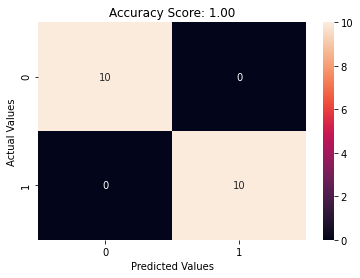

In [ ]:
matrix = confusion_matrix(y_test,predicted)
fig = sns.heatmap(matrix, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0:.2f}'.format(accuracy_score(y_test, clf.predict(x_test))), size=12)
plt.show()

Doğrusal çekirdeğe sahip bir Destek Vektör Makinesi sınıflandırıcısını kullanarak iki sınıflı ayrılabilir bir veri kümesi içinde maksimum marjini ayıran hiperdüzlemi çizelim. 

Burada, iki nokta kümesi arasındaki marjini en üst düzeye çıkaran bölme çizgisidir. Eğitim noktalarından birkaçının sadece kenar boşluğuna değdiğine dikkat ediniz siyah daireler şeklinde gösterilmişlerdir. Bu noktalar, uyumun temel unsurlarıdır ve destek vektörleri olarak bilinir ve algoritmaya adını verir. 


<div>
<img src="https://miro.medium.com/max/550/0*uhvuDKYsPE3WqgPP.png" width="300"/>
</div>

*   **Hiper düzlem :** Bir dizi veriyi ayıran ve sınıflandıran bir karar düzlemi

*   **Destek vektörleri :** Hiper düzleme en yakın veri noktaları

*   **Kenar boşluğu :** Hiper düzlem ile her iki setten en yakın veri noktası arasındaki mesafe

In [ ]:
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-10, 10)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

p1 = go.Scatter(x=xx, y=yy, 
                mode='lines',
                showlegend=False,
                line=dict(color='black', 
                          width=1))

p2 = go.Scatter(x=xx, y=yy_down, 
                mode='lines',
                showlegend=False,
                line=dict(color='black',
                          width=1,
                          dash='dash'))

p3 = go.Scatter(x=xx, y=yy_up,
                mode='lines',
                showlegend=False,
                line=dict(color='black',
                          width=1,
                          dash='dash'))

p4 = go.Scatter(x=clf.support_vectors_[:, 0],
                y=clf.support_vectors_[:, 1],
                mode='markers',
                showlegend=False,
                marker=dict(color='white', size=16,
                            line=dict(color='black', width=1)))

p5 = go.Scatter(x=X[:, 0], y=X[:, 1],
                mode='markers',
                marker=dict(color=y, 
                            colorscale='Inferno',
                            line=dict(color='black', width=1)))

layout = go.Layout(xaxis=dict(zeroline=False),
                   yaxis=dict(zeroline=False),
                   hovermode='closest', showlegend=False,
                   title='Decision function for a 2D SVC',
                   yaxis_title="X2",
                   xaxis_title="X1",
                   width=600)
fig = go.Figure(data = [p1, p2, p3, p4, p5], layout=layout)

fig.show()

Yeni gelen bir verinin hangi sınıfa ait olduğunun tahmin edilmesi

In [ ]:
given_data = [2,3]
color = ['black','yellow']
prediction = clf.predict([given_data])
p6 = go.Scatter(x=[given_data[0]], 
                y=[given_data[1]],
                mode='markers+text',
                text='predicted label-' + str(prediction[0]),
                textposition="top right",
                marker=dict(color=color[prediction[0]], 
                            line=dict(color='red', width=2)))

layout = go.Layout(xaxis=dict(zeroline=False),
                   yaxis=dict(zeroline=False),
                   hovermode='closest', showlegend=False,
                   title='Model prediction for a new data',
                   yaxis_title="X2",
                   xaxis_title="X1",
                   width=600)
fig = go.Figure(data = [p1, p2, p3, p4, p5, p6], layout=layout)

fig.show()

SVM, marjini "yumuşatan" bir miktar parametreye sahiptir: yani, daha iyi bir uyuma izin veriyorsa, bazı noktaların marjın içine girmesine izin verilir. Marjin sertliği, en sık olarak bilinen bir ayar parametresi tarafından kontrol edilir.C, çok büyük değerler için, kenar boşluğu zordur ve noktalar içinde bulunamaz. Daha küçük değerlerde kenar boşluğu daha yumuşaktır ve bazı noktaları kapsayacak şekilde büyüyebilir.

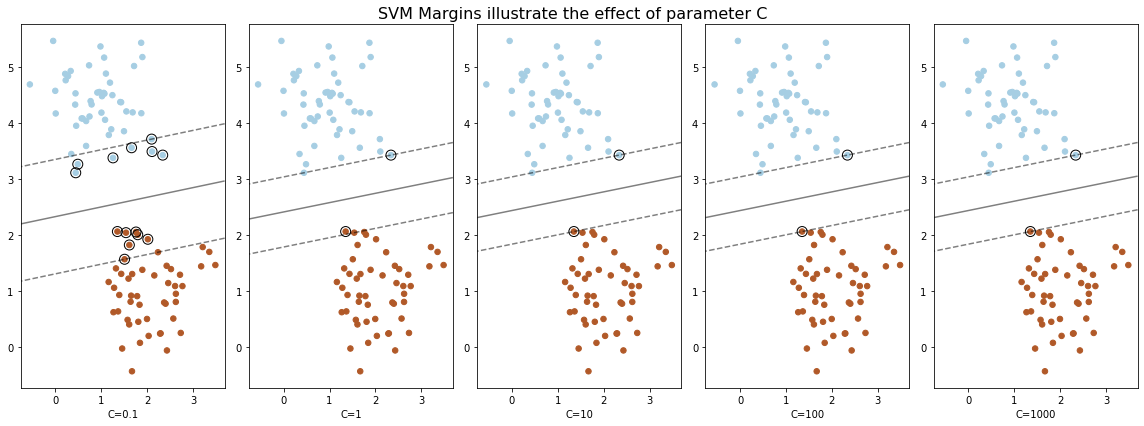

In [ ]:
plt.figure(figsize=(16, 6))
for i, C in enumerate(parameters['C']):
    # "hinge" is the standard SVM loss
    clf = SVC(C=C, degree=1, gamma=1, kernel='linear', random_state=42) .fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where(
        np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, len(parameters['C']), i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
    plt.xlabel("C=" + str(C))
    plt.title(" ")
plt.suptitle("SVM Margins illustrate the effect of parameter C", fontsize=16)
plt.tight_layout()
plt.show()

<a name="cell-id3"></a>
## **4.** K- En yakın Komşu Sınıflandırıcısı (KNN)

<div>
<img src="https://miro.medium.com/max/1022/1*AuXDgGrr0wbCoF6KDXXSZQ.jpeg" width="300"/>
</div>

(KNN) algoritması, hem sınıflandırma hem de regresyon problemlerini çözmek için kullanılabilen basit, uygulaması kolay, denetimli bir makine öğrenme algoritmasıdır. KNN algoritması, benzer şeylerin birbirine yakın olduğunu varsayar. 

<div>
<center>
<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final1_ibdm8a.png
" width="400"/>

-Mesafeyi hesaplayın

-En yakın komşuları bulun

-Etiketlere oy verin
</center>
</div>

KNN, daha az sayıda öznitelik üzerinde daha iyi performans gösterir. Öznitelik sayısı arttıkça performans düşer. Yani veri boyutundaki artış, aşırı uyum sorununa yol açar. Bu soruna boyutsallığın laneti denir. 



In [ ]:
parameters = {
    'n_neighbors': [3, 5, 7, 9, 11], # usually odd numbers
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'mahalanobis', 'haversine']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    parameters,
    verbose=1,
    cv=3,
    n_jobs=-1
)

gs_results = gs.fit(x_train, y_train)

sorted(gs_results.cv_results_.keys())

In [ ]:
gs_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

In [ ]:
print('All scores: ', gs_results.cv_results_['mean_test_score'])
print('All parameters: ', gs_results.cv_results_['params'])
print('Ranks for test scores: ', gs_results.cv_results_['rank_test_score'])
print('Std_dev per accuracy', gs_results.cv_results_['std_test_score'])


Verileriniz için doğru olan K değerini seçerken, KNN algoritmasını farklı K değerleriyle birkaç kez çalıştırırız ve algoritmanın kendisine veri verildiğinde doğru tahminler yapma yeteneğini korurken karşılaştığımız hata sayısını azaltan K'yi seçeriz. Aynı zamanda veri bilimciler, sınıf sayısı çift ise K değerini tek sayı olarak seçerler. 

<div>
<center>
<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png" width="250"/>
</center>
</div>

In [ ]:
trainAcc = []
testAcc = []

for k in parameters['n_neighbors']:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(x_train, y_train)
    Y_predTrain = clf.predict(x_train)
    Y_predTest = clf.predict(x_test)
    trainAcc.append(accuracy_score(y_train, Y_predTrain))
    testAcc.append(accuracy_score(y_test, Y_predTest))

fig = go.Figure()
fig.add_trace(go.Scatter(x=parameters['n_neighbors'], 
                        y=testAcc,
                        name='Test Accuracy',
                        marker_symbol='star-dot'))

fig.add_trace(go.Scatter(x=parameters['n_neighbors'], 
                        y=trainAcc,
                        name='Training Accuracy',
                        marker_symbol='diamond-wide-open-dot'))

fig.update_layout(
    title='KNN Classifier - Accuracy vs k-negighbors',
    title_font_size=16,
    yaxis_title="Accuracy",
    xaxis_title="Number of neighbors",
    width=600)

fig.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [ ]:
train_accuracy = accuracy_score(y_train, knn.predict(x_train))
train_accuracy

1.0

In [ ]:
test_accuracy = accuracy_score(y_test, knn.predict(x_test))
test_accuracy

1.0

In [ ]:
print(classification_report(y_test, knn.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



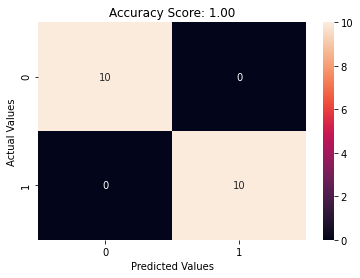

In [ ]:
matrix = confusion_matrix(y_test,knn.predict(x_test))
fig = sns.heatmap(matrix, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0:.2f}'.format(test_accuracy), size=12)
plt.show()

In [ ]:
mesh_size = .02
margin = 0.25

# Create a mesh grid on which we will run our model
x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

Z = knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

trace_specs = [
    [x_train, y_train, 0, 'Train', 'square'],
    [x_train, y_train, 1, 'Train', 'circle'],
    [x_test, y_test, 0, 'Test', 'square-dot'],
    [x_test, y_test, 1, 'Test', 'circle-dot']
]

fig = go.Figure(data=[
    go.Scatter(
        x=X[y==label, 0], y=X[y==label, 1],
        name=f'{split} Split, Label {label}',
        mode='markers', marker_symbol=marker
    )
    for X, y, label, split, marker in trace_specs
])
fig.update_traces(
    marker_size=12, marker_line_width=1.5,
    marker_color="lightyellow"
)

fig.add_trace(
    go.Contour(
        x=xrange,
        y=yrange,
        z=Z,
        showscale=False,
        colorscale='RdBu',
        opacity=0.4,
        name='Score',
        hoverinfo='skip'
    )
)

fig.update_layout(
    title="2-Class classification (k = 3, weights = 'distance', distance_metric = 'euclidean')",
    title_font_size=16,
    yaxis_title="X2",
    xaxis_title="X1",
    width=700)

fig.show()

**KNN nasıl iyileştirilir?**

Daha iyi sonuçlar için, verilerin aynı ölçekte normalleştirilmesi şiddetle tavsiye edilir. Genel olarak, 0 ile 1 arasında kabul edilen normalizasyon aralığı, büyük boyutlu veriler için uygun değildir. Bu gibi durumlarda, performansı iyileştirmek için boyutun küçültülmesi gerekir. Ayrıca, eksik değerleri ele almak, sonuçları iyileştirmemize yardımcı olacaktır.

**Avantajlar**

* Algoritma basit ve uygulaması kolaydır.

* Bir model oluşturmaya, birkaç parametreyi ayarlamaya veya ek varsayımlar yapmaya gerek yoktur.

* Algoritma çok yönlüdür. Sınıflandırma, regresyon ve arama için kullanılabilir.

**Dezavantajları**

* Özniteliklerin veya bağımsız değişkenlerin sayısı arttıkça algoritma önemli ölçüde yavaşlar.

#**Referanslar**


*   [Scikit-Learn](https://scikit-learn.org/stable/)
*   [Precision & Recall](https://en.wikipedia.org/wiki/Precision_and_recall)
*   [SVM Tutorial](https://medium.com/nyu-a3sr-data-science-team/support-vector-machines-and-wine-cef59ad38b41)
*   [SVM in depth](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)
*   [SVM images](https://medium.datadriveninvestor.com/part-i-a-high-level-overview-of-support-vector-machines-9d5c8122100a) 
*   [KNN Tutorial](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)
*   [KNN with Scikit](https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn) 